## Dataset ===>> https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./../data/raw/Car Price Prediction/CarPrice_Assignment.csv")

In [3]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

## Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
data["Company"] = data["CarName"].apply(lambda x: x.split(" ")[0])
data["Company"] = data["Company"].apply(lambda x: x.lower())

In [9]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price      Company  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 27 columns]

In [10]:
data['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
data['Company'].replace({'maxda': 'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}, inplace=True)

In [12]:
data.drop(['car_ID'],axis=1, inplace=True)

In [13]:
cat_cols= [col for col in data.columns if data[col].dtype=='object']
num_cols= [col for col in data.columns if data[col].dtype!='object']

In [14]:
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company']

In [15]:
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [16]:
num_cols.remove('price')
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## Exploratory Data Analysis

ValueError: num must be an integer with 1 <= num <= 20, not 21

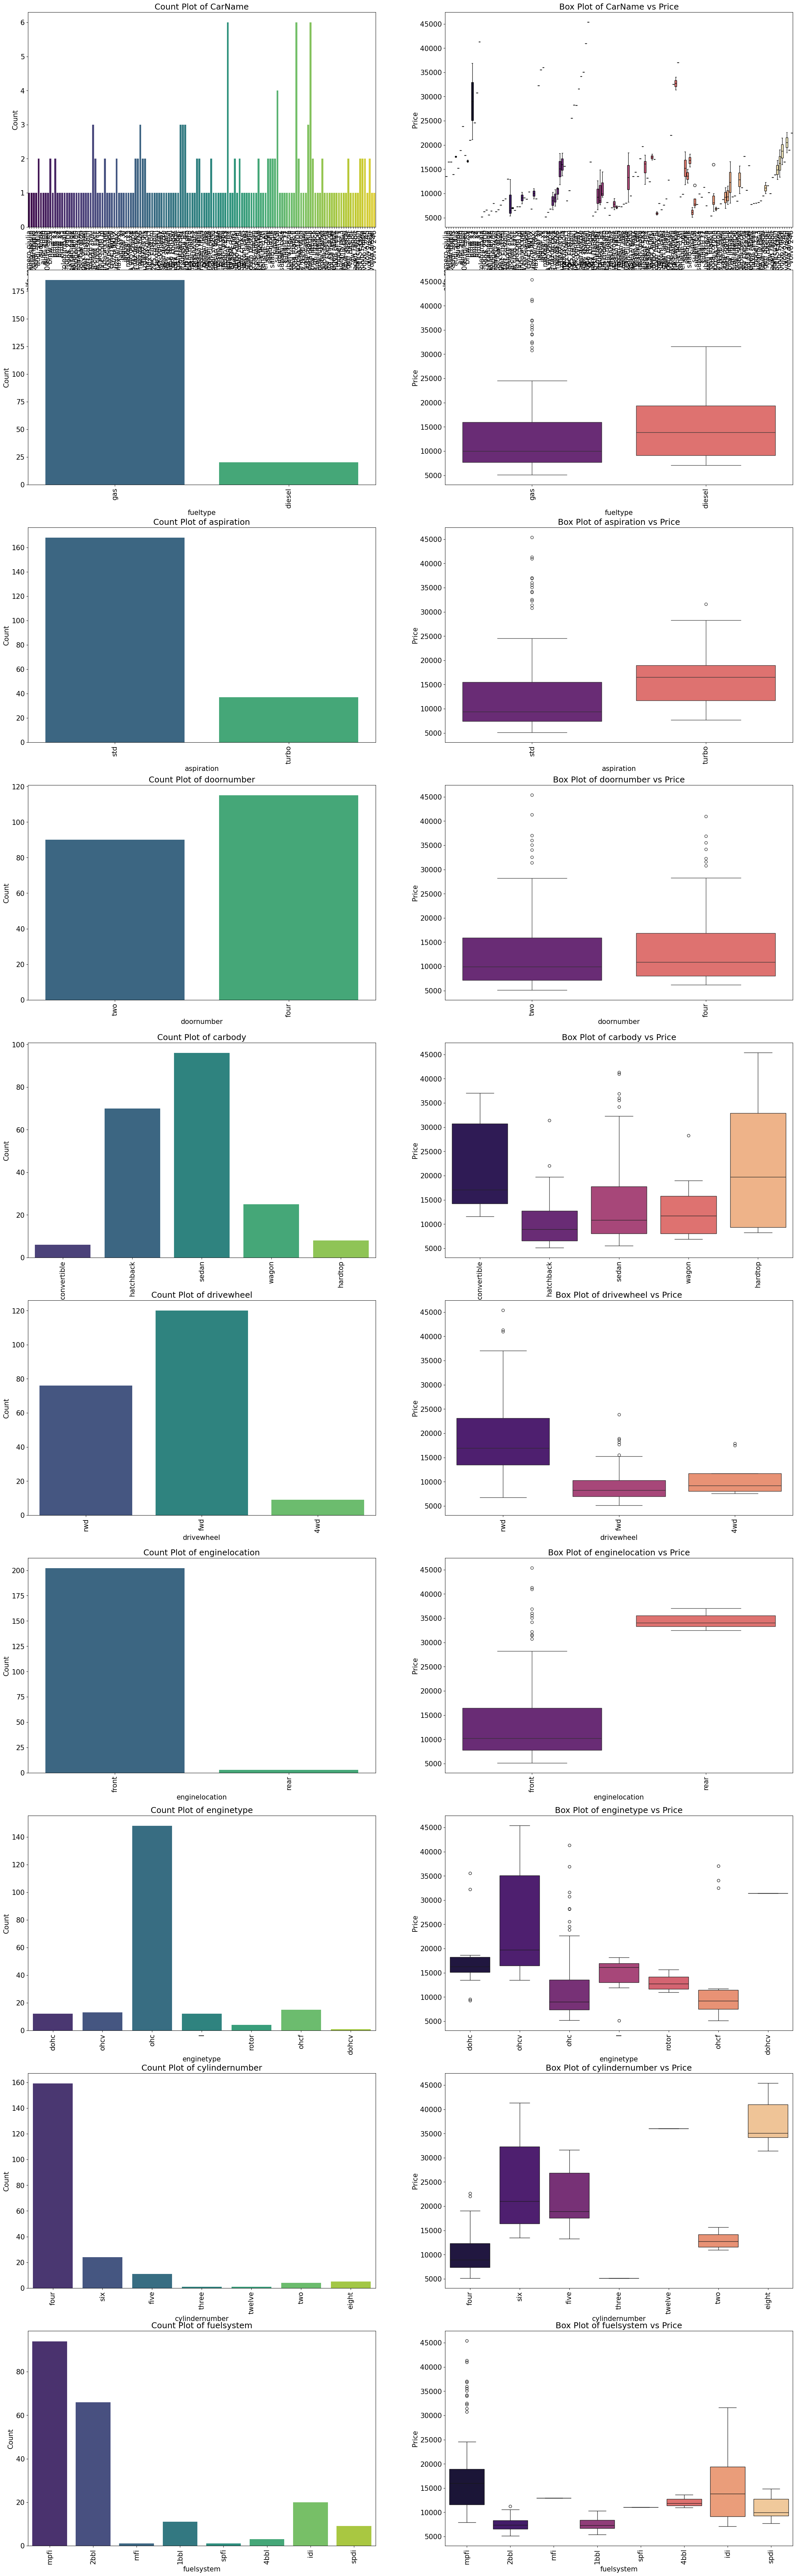

In [17]:
plt.figure(figsize=(30, 100))
i = 1

for col in cat_cols:
    plt.subplot(10, 2, i)
    sns.countplot(data=data, x=col, palette='viridis')
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'Count Plot of {col}', fontsize=18)
    
    i += 1
    
    plt.subplot(10, 2, i)
    sns.boxplot(data=data, x=col, y='price', palette='magma')
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Price', fontsize=15)
    plt.title(f'Box Plot of {col} vs Price', fontsize=18)
    
    i += 1

plt.tight_layout()
plt.show()

### Key Insights

- **Fuel Type**: Diesel cars tend to be slightly higher-priced than gas cars. However, the number of gas cars is significantly higher than diesel cars.  
- **Aspiration**: Turbocharged cars are priced higher than standard (std) cars.  
- **Body Style**: Sedans and hatchbacks account for more than **75%** of total cars.  
- **Drive Wheels**: Rear-wheel-drive (RWD) cars are priced higher than other drive types.  
- **Engine Location**: The median price of cars with the **engine at the back** is over **three times** the median price of cars with the engine in front.  
- **Engine Type**: Most cars have **OHC** (Overhead Camshaft) engines, but **OHCV** (Overhead Camshaft with Valves) engines tend to be higher priced.  
- **Cylinders**: The general trend shows that **car prices increase with the number of cylinders**.  
- **Popularity**: **Toyota** is the most liked car.  
- **Luxury Brands**: **Porsche, Jaguar, BMW, and Buick** belong to the high-end price range.  
ange cars

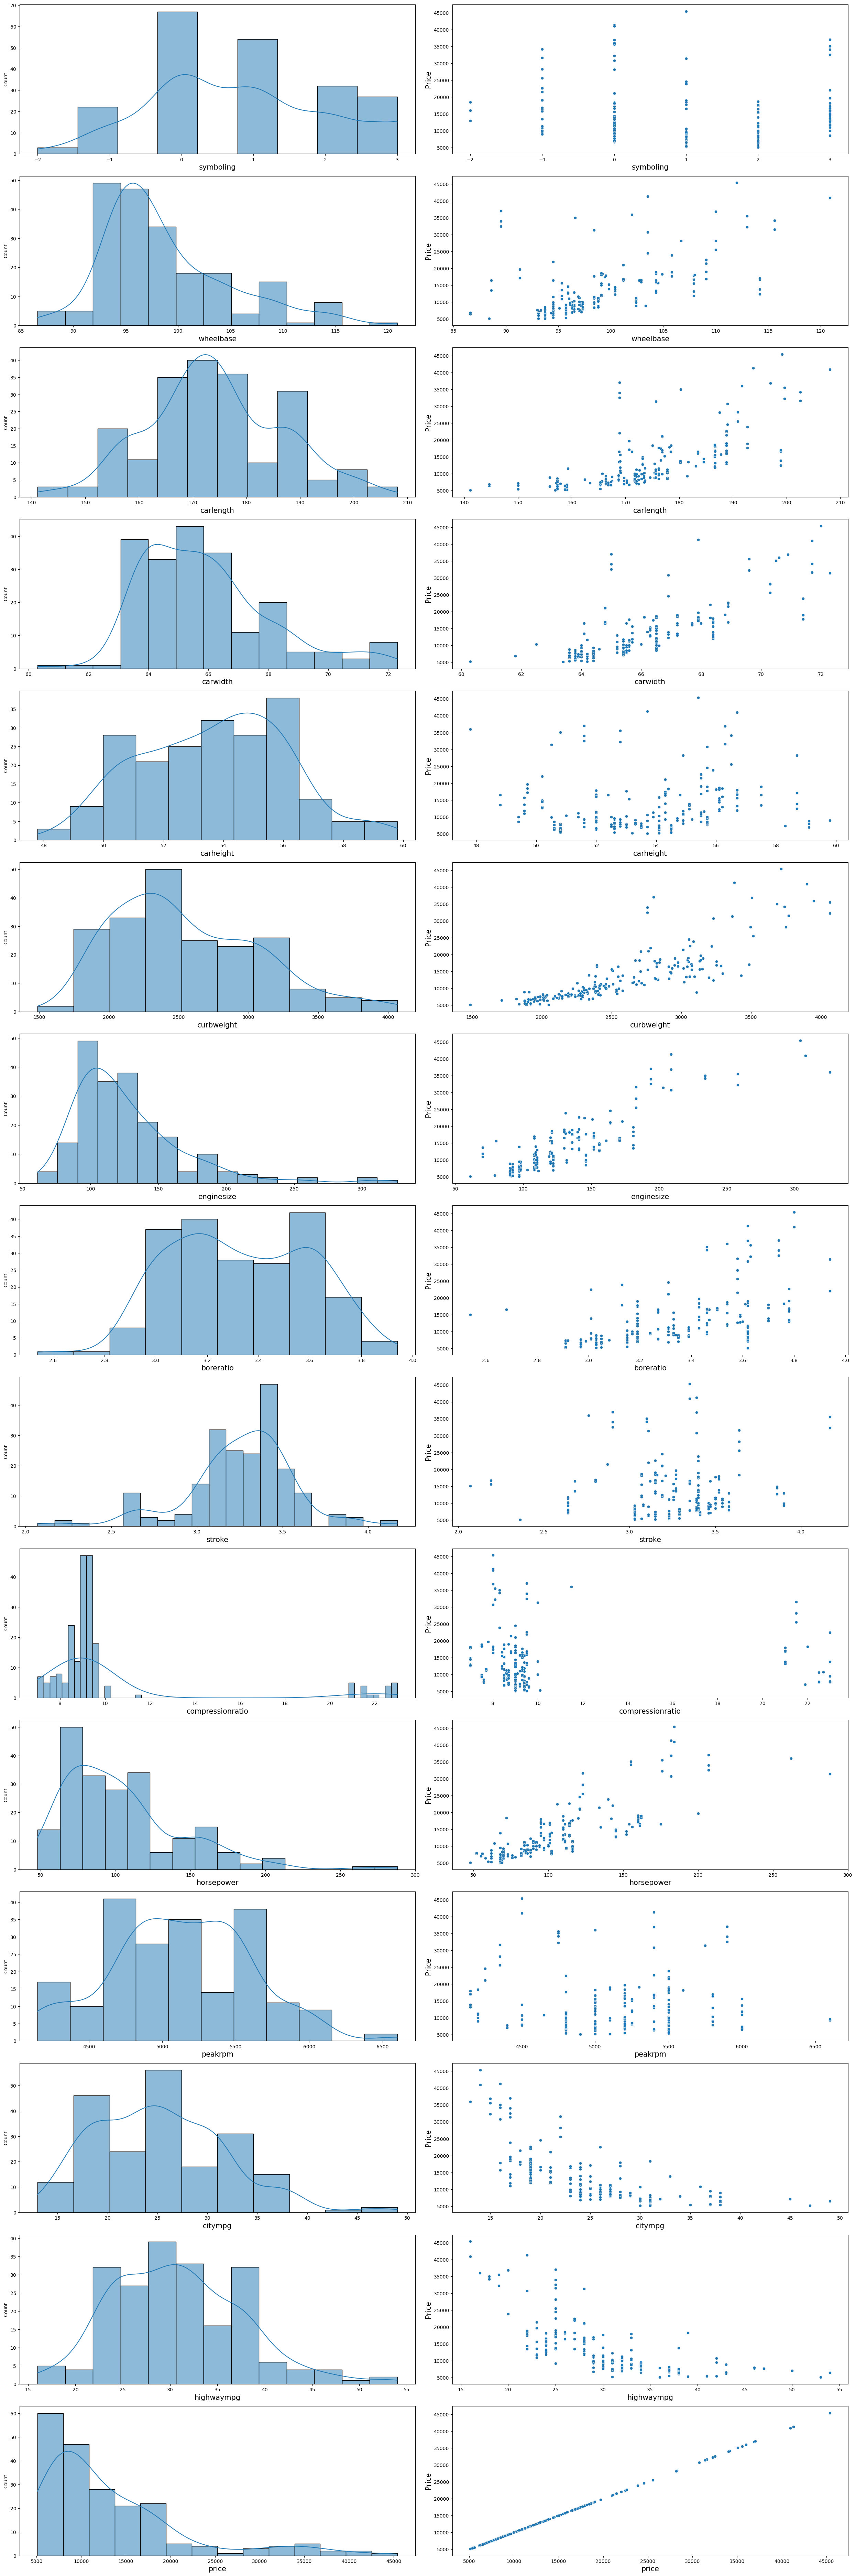

In [18]:
# Ensure num_cols is a list of numerical columns
num_cols = data.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(25, len(num_cols) * 5))  # Dynamically adjust figure size
i = 1

for col in num_cols:
    plt.subplot(len(num_cols), 2, i)
    sns.histplot(data[col], kde=True)  # Replaced deprecated distplot
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)
    i += 1

    plt.subplot(len(num_cols), 2, i)
    sns.scatterplot(x=data[col], y=data['price'])
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel('Price', fontsize=15)
    plt.yticks(fontsize=10)
    i += 1

plt.tight_layout()
plt.show()


### Key Insights:

- **Positive Correlation:** Price increases with car length, car width, curb weight, engine size, and horsepower.  
- **Negative Correlation:** Price decreases with city mileage and highway mileage.  
- **No Correlation:** Symboling has no relation with price, so the column can be dropped.  
mn

In [19]:
data.drop('symboling', axis=1, inplace=True)
num_cols.remove('symboling')

In [20]:
data.head()

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0        rwd          front       88.6      168.8      64.1  ...        mpfi   
1        rwd          front       88.6      168.8      64.1  ...        mpfi   
2        rwd          front       94.5      171.2      65.5  ...        mpfi   
3        fwd          front       99.8      176.6      66.2  ...        mpfi   
4        4wd          front       99.4      176.6      66.4  ...        mpfi   

   boreratio stroke compressionratio  horsepower peakrpm  citympg  highwaympg  \
0       3.47   2.68              9.0         111    5000       21          27   
1       3.47   2.68              9.0         111    5000       21          27   
2       2.68   3.47              9.0         154    5000       19          26   
3       3.19   3.40             10.0         102    5500       24          30   
4       3.19   3.40              8.0         115    5500       18          22   

     price      Company  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 25 columns]

In [21]:
num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

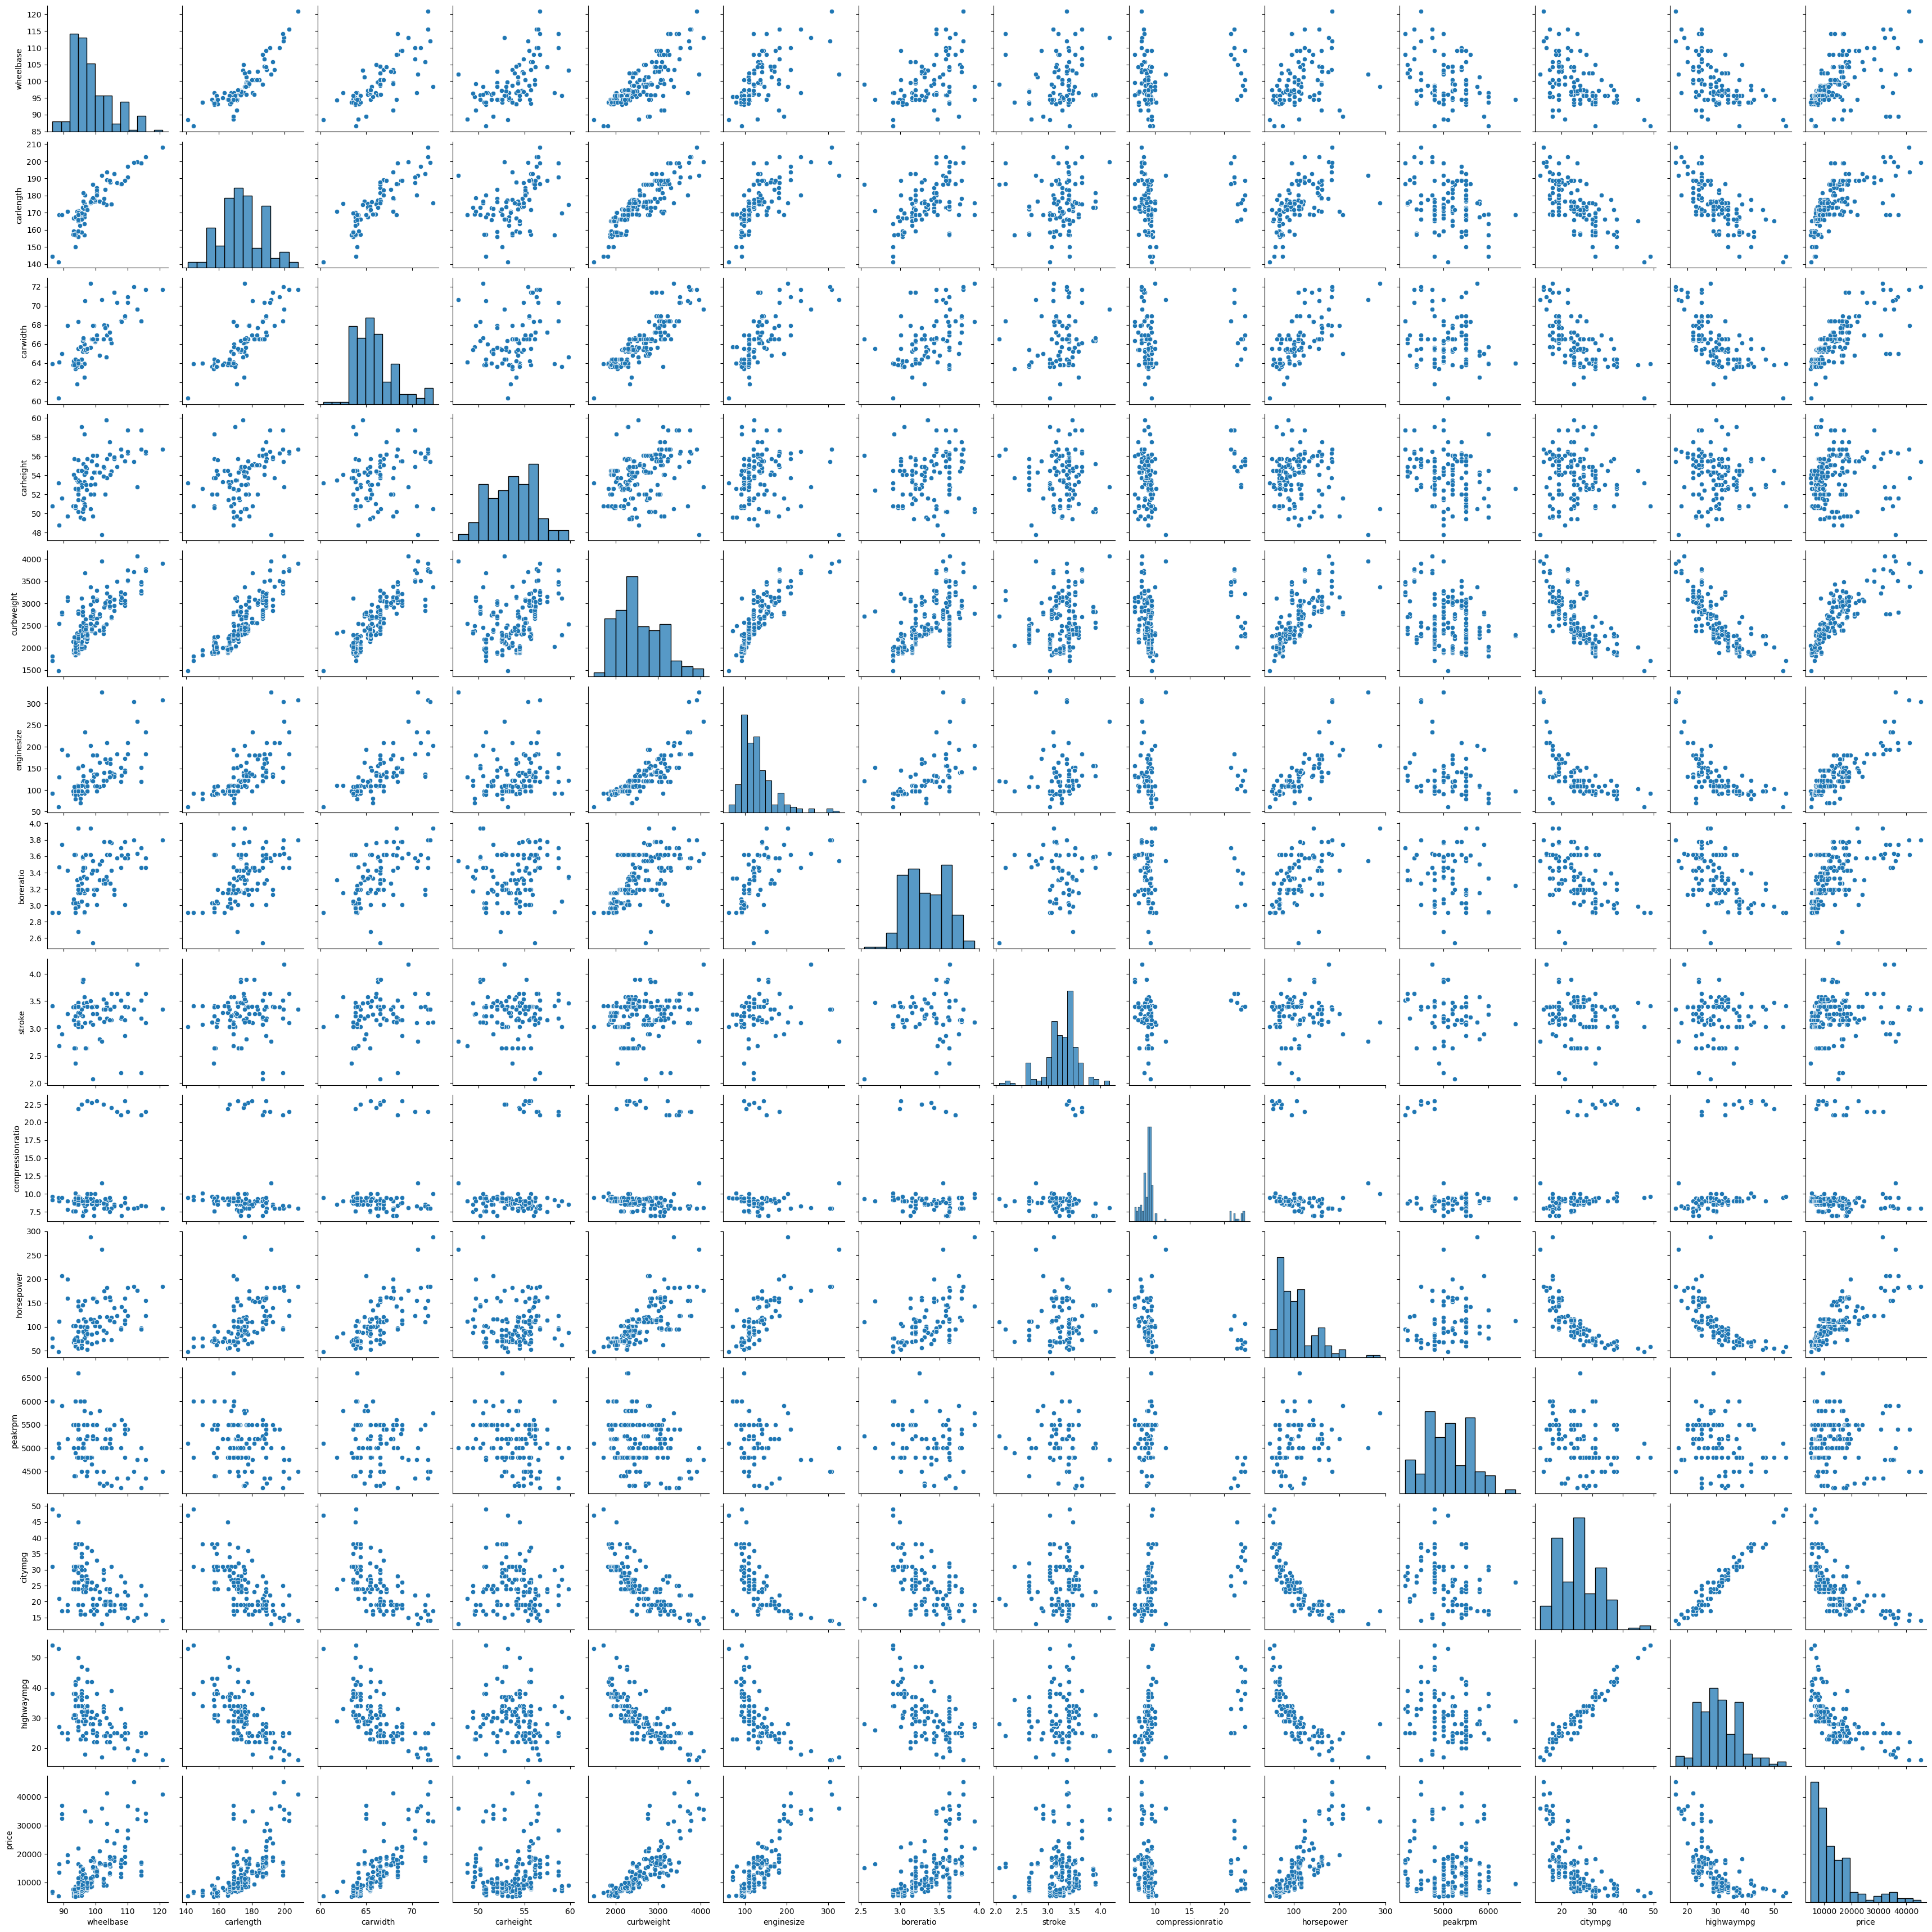

In [22]:
ax = sns.pairplot(data[num_cols])

## Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data[cat_cols]= data[cat_cols].apply(lambda x: le.fit_transform(x))

In [24]:
data[cat_cols].head()

CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        2         1           0           1        0           2   
1        3         1           0           1        0           2   
2        1         1           0           1        2           2   
3        4         1           0           0        3           1   
4        5         1           0           0        3           0   

   enginelocation  enginetype  cylindernumber  fuelsystem  Company  
0               0           0               2           5        0  
1               0           0               2           5        0  
2               0           5               3           5        0  
3               0           3               2           5        1  
4               0           3               1           5        1

In [25]:
data.head()

CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        2         1           0           1        0           2   
1        3         1           0           1        0           2   
2        1         1           0           1        2           2   
3        4         1           0           0        3           1   
4        5         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0       88.6      168.8      64.1  ...           5       3.47   
1               0       88.6      168.8      64.1  ...           5       3.47   
2               0       94.5      171.2      65.5  ...           5       2.68   
3               0       99.8      176.6      66.2  ...           5       3.19   
4               0       99.4      176.6      66.4  ...           5       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  Company  
0  13495.0        0  
1  16500.0        0  
2  16500.0        0  
3  13950.0        1  
4  17450.0        1  

[5 rows x 25 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

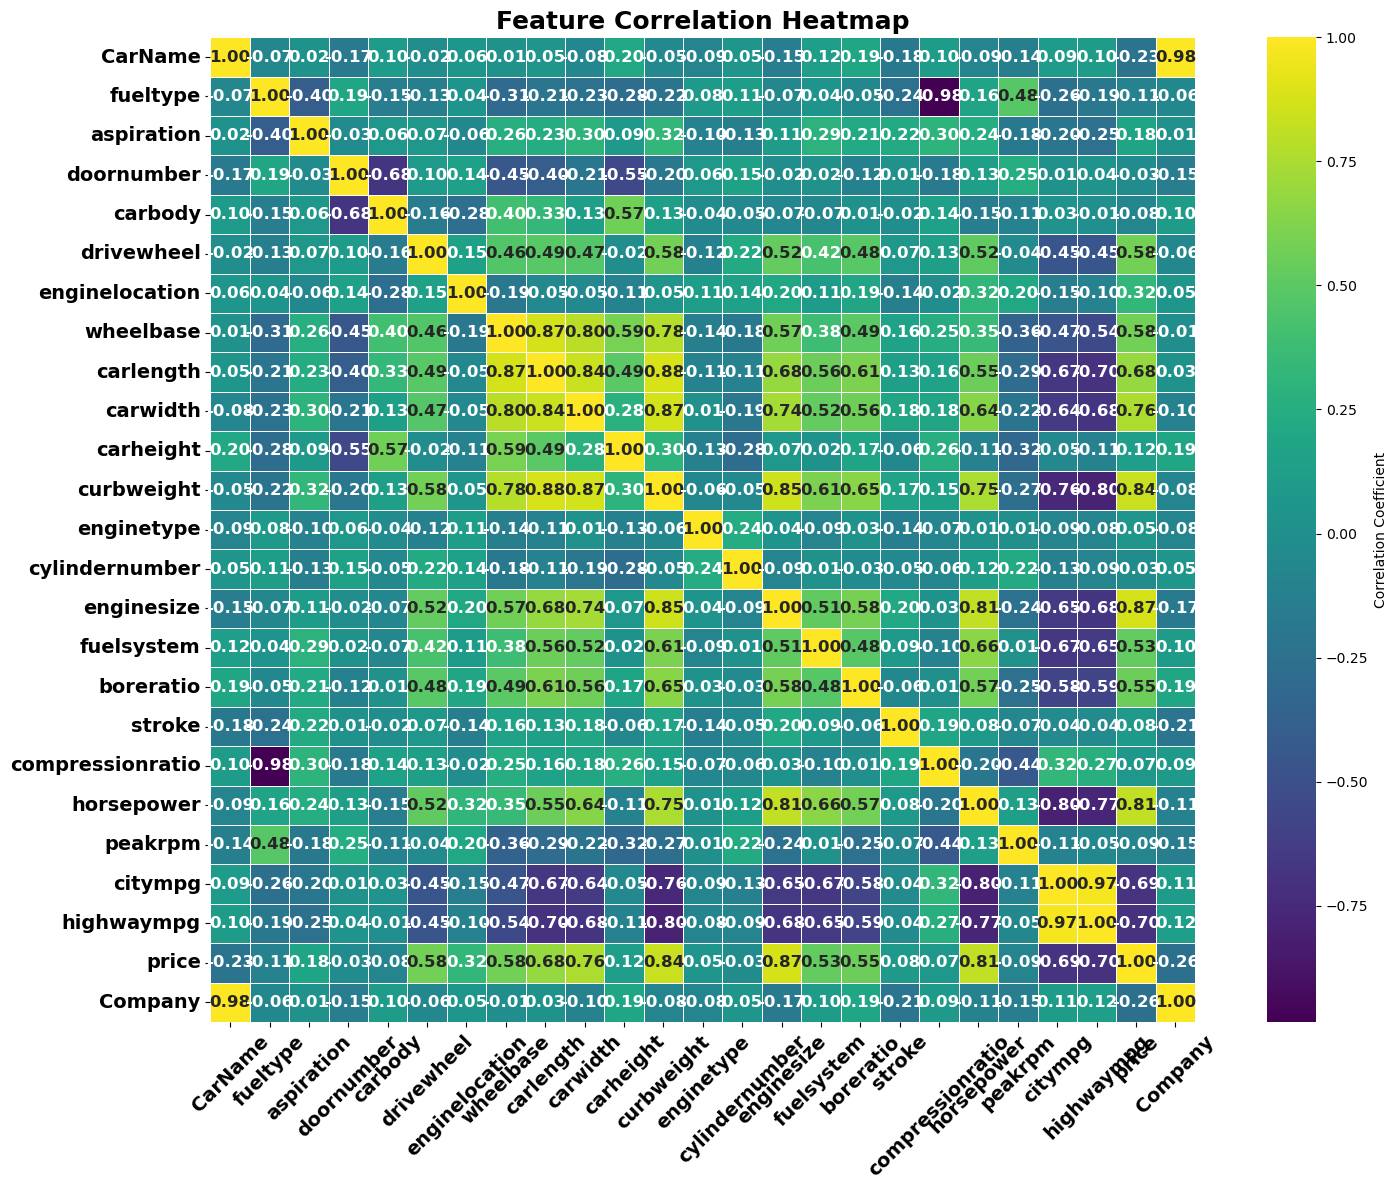

In [27]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar=True, square=True, 
            annot_kws={"size": 12, "weight": 'bold'}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Feature Correlation Heatmap", fontsize=18, weight='bold')
plt.xticks(rotation=45, fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')  
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
data[num_cols]= ss.fit_transform(data[num_cols])

In [29]:
data.head()

CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        2         1           0           1        0           2   
1        3         1           0           1        0           2   
2        1         1           0           1        2           2   
3        4         1           0           0        3           1   
4        5         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0  -1.690772  -0.426521 -0.844782  ...           5   0.519071   
1               0  -1.690772  -0.426521 -0.844782  ...           5   0.519071   
2               0  -0.708596  -0.231513 -0.190566  ...           5  -2.404880   
3               0   0.173698   0.207256  0.136542  ...           5  -0.517266   
4               0   0.107110   0.207256  0.230001  ...           5  -0.517266   

     stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg  \
0 -1.839377         -0.288349    0.174483 -0.262960 -0.646553   -0.546059   
1 -1.839377         -0.288349    0.174483 -0.262960 -0.646553   -0.546059   
2  0.685946         -0.288349    1.264536 -0.262960 -0.953012   -0.691627   
3  0.462183         -0.035973   -0.053668  0.787855 -0.186865   -0.109354   
4  0.462183         -0.540725    0.275883  0.787855 -1.106241   -1.273900   

      price  Company  
0  0.027391        0  
1  0.404461        0  
2  0.404461        0  
3  0.084485        1  
4  0.523668        1  

[5 rows x 25 columns]

## Training our Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
X= data.drop('price', axis=1)
y=data['price']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 42)

In [32]:
dt = DecisionTreeRegressor(
    criterion='squared_error',  # 'mse' is deprecated, use 'squared_error'
    splitter='best',
    max_depth=100,
    min_samples_leaf=5,
    random_state=42
)

# Fit the model
dt.fit(X_train, y_train)

# Predict values
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculate RMSE for train and test sets
rmse_train = (mean_squared_error(y_train, y_pred_train)) ** 0.5
rmse_test = (mean_squared_error(y_test, y_pred_test)) ** 0.5

# Calculate R2 score for the test set
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"R² Score: {r2:.4f}")


Training RMSE: 0.1940
Test RMSE: 0.3399
R² Score: 0.9071


In [33]:
rf = RandomForestRegressor(
    max_depth=10,
    criterion='squared_error',  # 'mse' is deprecated, use 'squared_error'
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,  # Use all available CPUs for parallel computation
    verbose=1
)

# Fit the model
rf.fit(X_train, y_train)

# Predict values
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate RMSE for train and test sets
rmse_train = (mean_squared_error(y_train, y_pred_train)) ** 0.5
rmse_test = (mean_squared_error(y_test, y_pred_test)) ** 0.5

# Calculate R2 score for the test set
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"R² Score: {r2:.4f}")


Training RMSE: 0.1462
Test RMSE: 0.2467
R² Score: 0.9510


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
